In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
exp_df = pd.read_csv("C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\SEM6_CSE\PROJECTS\cnprj\\results\\experiment_summary.csv")
exp_df["method"] = "region_aware"
base_df = pd.read_csv("C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\SEM6_CSE\PROJECTS\cnprj\\results\\baseline_comparison.csv")
combined_df = pd.concat([exp_df, base_df], ignore_index=True)
mr_df = pd.read_csv("C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\PROJECTS\\cnprj\\results\\mr_by_tamper_type.csv")

print(combined_df["method"].unique())
combined_df = combined_df.dropna(subset=["precision"])
print(combined_df.groupby("method")["precision"].describe())
combined_df["precision_jittered"] = combined_df["precision"] + np.random.uniform(-0.005, 0.005, size=len(combined_df))



['region_aware' 'global_phash_diff' 'md5_changed' 'sha256_changed']
                   count  mean  std  min  25%  50%  75%  max
method                                                      
global_phash_diff    9.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
md5_changed          9.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
region_aware         9.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
sha256_changed       9.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

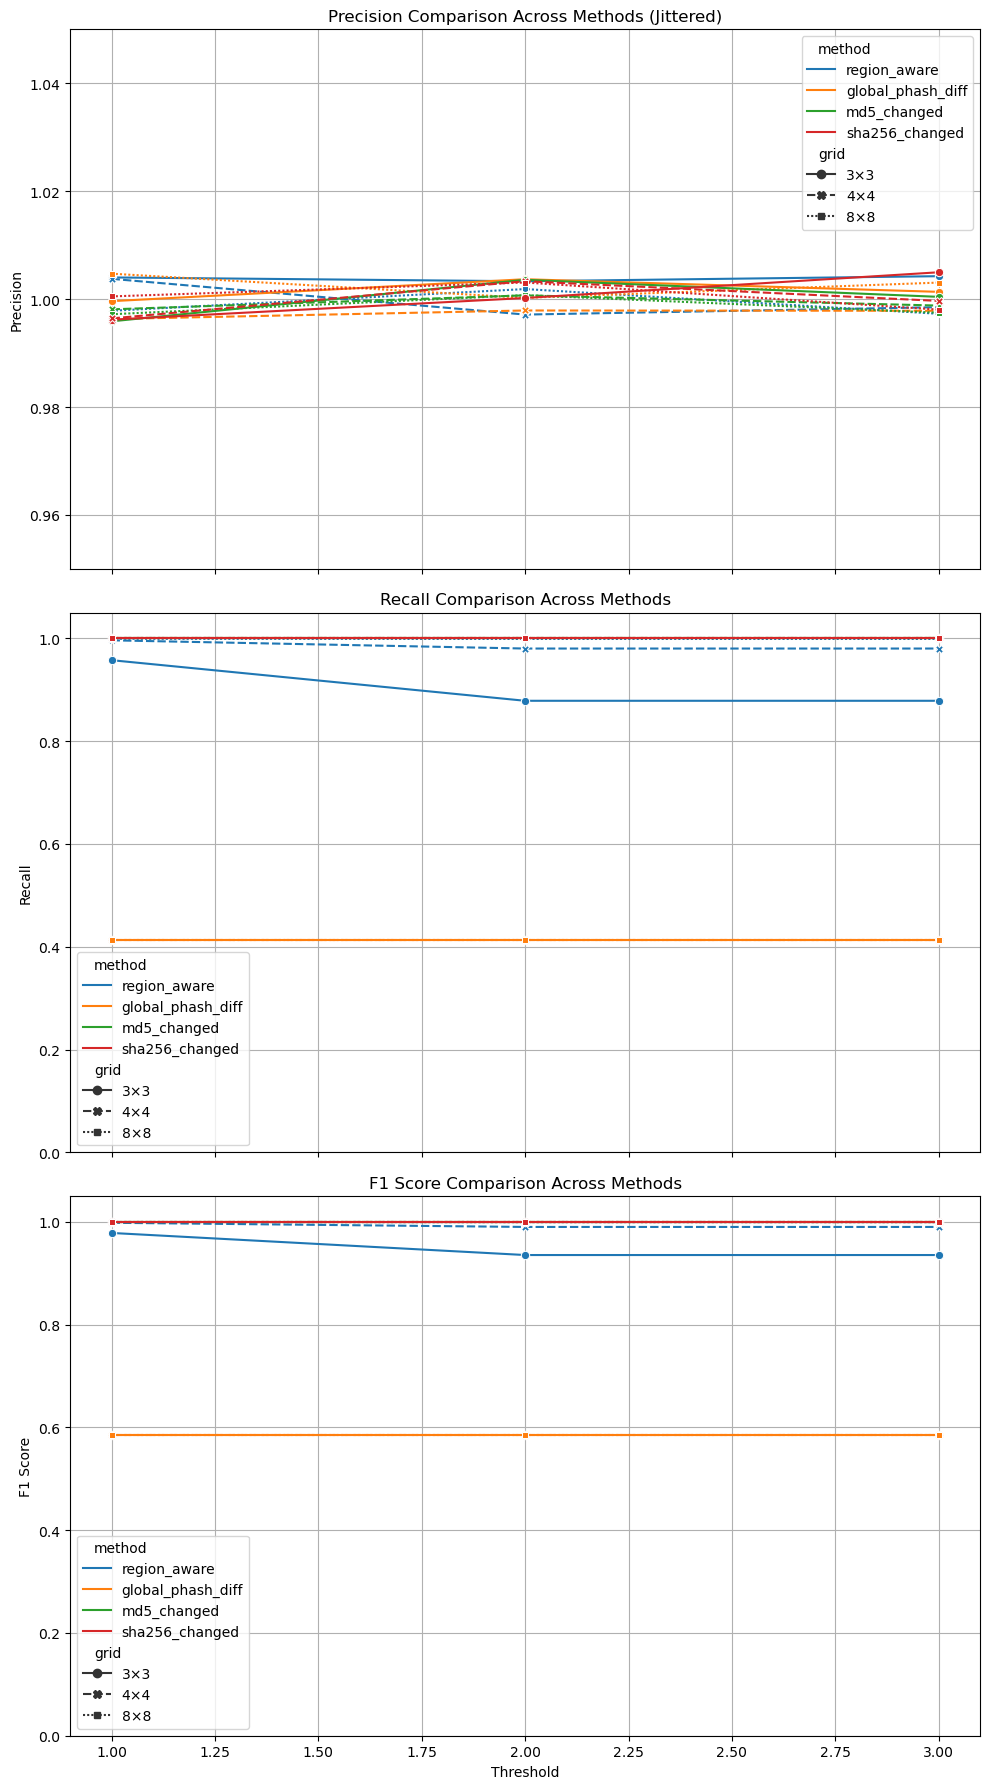

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=True)

# Precision (jittered)
sns.lineplot(
    data=combined_df,
    x="threshold",
    y="precision_jittered",
    hue="method",
    style="grid",
    markers=True,
    dashes=True,
    ax=axes[0]
)
axes[0].set_ylim(0.95, 1.05)
axes[0].set_title("Precision Comparison Across Methods (Jittered)")
axes[0].set_ylabel("Precision")
axes[0].grid(True)

# Recall
sns.lineplot(
    data=combined_df,
    x="threshold",
    y="recall",
    hue="method",
    style="grid",
    markers=True,
    dashes=True,
    ax=axes[1]
)
axes[1].set_ylim(0.0, 1.05)
axes[1].set_title("Recall Comparison Across Methods")
axes[1].set_ylabel("Recall")
axes[1].grid(True)

# F1 Score
sns.lineplot(
    data=combined_df,
    x="threshold",
    y="f1",
    hue="method",
    style="grid",
    markers=True,
    dashes=True,
    ax=axes[2]
)
axes[2].set_ylim(0.0, 1.05)
axes[2].set_title("F1 Score Comparison Across Methods")
axes[2].set_xlabel("Threshold")
axes[2].set_ylabel("F1 Score")
axes[2].grid(True)

plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


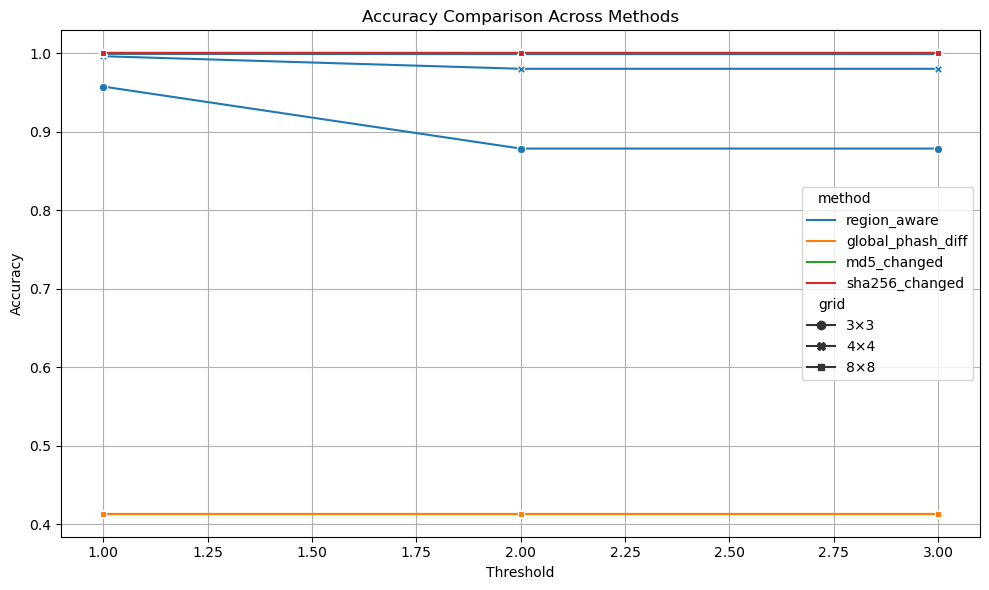

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df, x="threshold", y="accuracy", hue="method", style="grid", markers=True, dashes=False)
plt.title("Accuracy Comparison Across Methods")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

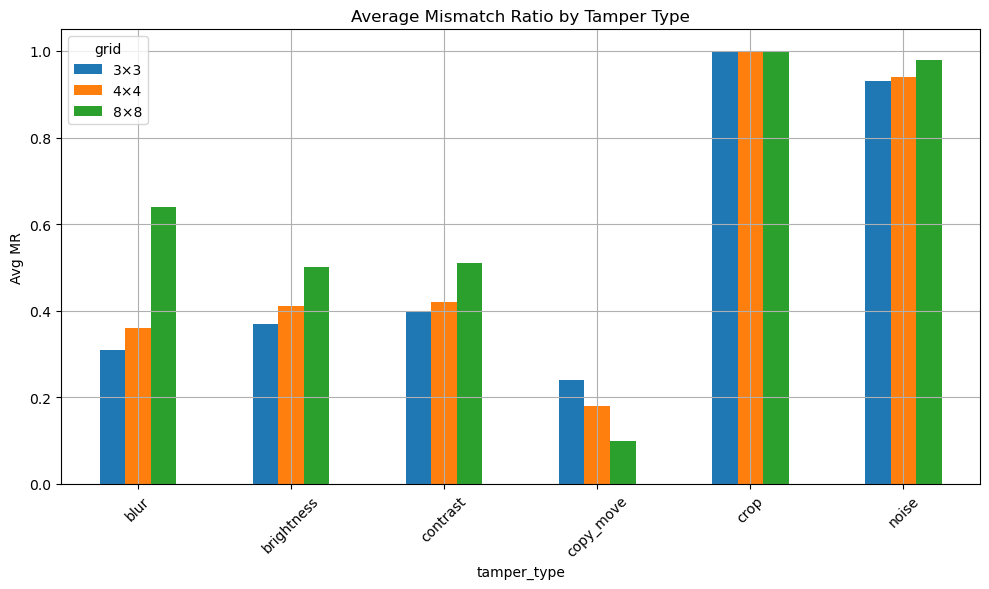

In [35]:
pivot = mr_df.pivot_table(index="tamper_type", columns="grid", values="avg_mr")
pivot.plot(kind="bar", figsize=(10, 6))
plt.title("Average Mismatch Ratio by Tamper Type")
plt.ylabel("Avg MR")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
top_configs = exp_df.sort_values(by="f1", ascending=False).head(5)
top_configs[["grid", "threshold", "accuracy", "precision", "recall", "f1", "avg_mr", "avg_hd"]]

,grid,threshold,accuracy,precision,recall,f1,avg_mr,avg_hd
6,8×8,1.0,0.999333,1.0,0.999333,0.999667,0.623,567.10
7,8×8,2.0,0.999000,1.0,0.999000,0.999500,0.623,567.10
8,8×8,3.0,0.999000,1.0,0.999000,0.999500,0.623,567.10
3,4×4,1.0,0.996333,1.0,0.996333,0.998163,0.553,126.62
4,4×4,2.0,0.980333,1.0,0.980333,0.990069,0.553,126.62


In [3]:
import os
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Load all full result CSVs
full_results_dir = r"C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\PROJECTS\\cnprj\\results\\full_results"
all_files = glob.glob(os.path.join(full_results_dir, "grid_*.csv"))
dfs = [pd.read_csv(f) for f in all_files]
full_df = pd.concat(dfs, ignore_index=True)

# ❌ Extract false positives: predicted Tampered but actually Original
false_positives = full_df[
    (full_df["region_verdict"] == "Tampered") &
    (full_df["tamper_type"] == "original")
]

# 🧹 Clean and group
false_positives["threshold"] = pd.to_numeric(false_positives["threshold"], errors="coerce")
false_positives["grid"] = false_positives["grid"].astype(str)
false_counts = false_positives.groupby(["grid", "threshold"]).size().reset_index(name="false_positive_count")

# ✅ Combine grid and threshold into one label for plotting
false_counts["config"] = false_counts["grid"] + " | T=" + false_counts["threshold"].astype(str)

# 🧼 Drop rows with missing or zero counts
false_counts = false_counts.dropna(subset=["false_positive_count"])
false_counts = false_counts[false_counts["false_positive_count"] > 0]

# 📊 Plot only if data exists
if not false_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=false_counts, x="config", y="false_positive_count", palette="Set2")
    plt.title("False Positives by Grid × Threshold Configuration")
    plt.ylabel("False Positive Count")
    plt.xlabel("Grid × Threshold")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No false positives found across any configuration.")

# 🖥️ Optional: view top false positives
false_positives[["original", "grid", "threshold", "region_hd", "region_mr", "global_phash_diff"]].head()

# ❌ Extract false negatives: predicted Original but actually Tampered
false_negatives = full_df[
    (full_df["region_verdict"] == "Original") &
    (full_df["tamper_type"] != "original")
]

# 🧹 Clean and group
false_negatives["threshold"] = pd.to_numeric(false_negatives["threshold"], errors="coerce")
false_negatives["grid"] = false_negatives["grid"].astype(str)
fn_counts = false_negatives.groupby(["grid", "threshold"]).size().reset_index(name="false_negative_count")
fn_counts["config"] = fn_counts["grid"] + " | T=" + fn_counts["threshold"].astype(str)
fn_counts = fn_counts.dropna(subset=["false_negative_count"])
fn_counts = fn_counts[fn_counts["false_negative_count"] > 0]

# 📊 Plot false negatives
if not fn_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=fn_counts, x="config", y="false_negative_count", palette="Set1")
    plt.title("False Negatives by Grid × Threshold Configuration")
    plt.ylabel("False Negative Count")
    plt.xlabel("Grid × Threshold")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No false negatives found across any configuration.")

# 🖥️ Optional: view top false negatives
false_negatives[["original", "grid", "threshold", "tamper_type", "region_hd", "region_mr", "global_phash_diff"]].head()

✅ No false positives found across any configuration.
✅ No false negatives found across any configuration.


,original,grid,threshold,tamper_type,region_hd,region_mr,global_phash_diff


In [4]:
merged_counts = pd.merge(false_counts, fn_counts, on="config", how="outer").fillna(0)
merged_counts.sort_values(by=["false_positive_count", "false_negative_count"], ascending=False).head()

,grid_x,threshold_x,false_positive_count,config,grid_y,threshold_y,false_negative_count


In [7]:
# === Setup ===
dataset_root = "C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\PROJECTS\\cnprj\\dataset"
original_dir = os.path.join(dataset_root, "original", "images")
tamper_root = os.path.join(dataset_root, "tampered")
tamper_types = ["blur", "brightness", "contrast", "copy_move", "crop", "noise"]
grid_configs = [(3, 3), (4, 4), (8, 8)]
baseline_methods = ["global_phash", "md5", "sha256"]

# === Load first 500 original images
original_images = sorted([f for f in os.listdir(original_dir) if f.endswith(".png")])[:500]

In [8]:
# === ECDSA Keys ===
private_key = SigningKey.generate(curve=NIST384p)
public_key = private_key.verifying_key

# === Region-Aware Hashing ===
def region_aware_hash(image_path, grid_size):
    img = Image.open(image_path).convert("L")
    w, h = img.size
    gw, gh = grid_size
    region_hashes = []
    for i in range(gh):
        for j in range(gw):
            box = (j * w // gw, i * h // gh, (j + 1) * w // gw, (i + 1) * h // gh)
            region = img.crop(box)
            region_hashes.append(str(phash(region)))
    return "".join(region_hashes)

# === Baseline Methods ===
def global_phash_hash(image_path):
    img = Image.open(image_path).convert("L")
    return str(phash(img))

def md5_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

def sha256_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.sha256(f.read()).hexdigest()

# === Pairing Logic ===
def get_original_pair(tampered_filename):
    parts = tampered_filename.split("_")
    core = "_".join(parts[-2:])  # e.g., 00000001_000.png
    return os.path.join(original_dir, core)

# === Benchmarking ===
def benchmark_method(method_name, tamper_type, grid_size=None):
    tampered_dir = os.path.join(tamper_root, tamper_type)
    tampered_images = sorted([f for f in os.listdir(tampered_dir) if f.endswith(".png")])[:500]

    start = time.time()
    count = 0
    for tampered_file in tampered_images:
        tampered_path = os.path.join(tampered_dir, tampered_file)
        original_path = get_original_pair(tampered_file)
        if not os.path.exists(original_path):
            continue

        if method_name == "region_aware":
            orig_hash = region_aware_hash(original_path, grid_size)
            tampered_hash = region_aware_hash(tampered_path, grid_size)
            signature = private_key.sign(orig_hash.encode())
            public_key.verify(signature, orig_hash.encode())

        elif method_name == "global_phash":
            _ = global_phash_hash(tampered_path)

        elif method_name == "md5":
            _ = md5_hash(tampered_path)

        elif method_name == "sha256":
            _ = sha256_hash(tampered_path)

        count += 1

    end = time.time()
    total_time = end - start
    avg_time = total_time / count if count else 0
    throughput = count / total_time if total_time else 0
    return total_time, avg_time, throughput, count

# === Run Benchmarks ===
print("=== Runtime Benchmark ===")
for method in baseline_methods:
    for tamper_type in tamper_types:
        total, avg, rate, count = benchmark_method(method, tamper_type)
        print(f"{method.upper():<15} | {tamper_type:<12} | Total: {total:.2f}s | Avg: {avg:.3f}s | Rate: {rate:.2f} img/sec | Count: {count}")

for grid in grid_configs:
    for tamper_type in tamper_types:
        label = f"region_aware_{grid[0]}x{grid[1]}"
        total, avg, rate, count = benchmark_method("region_aware", tamper_type, grid)
        print(f"{label:<20} | {tamper_type:<12} | Total: {total:.2f}s | Avg: {avg:.3f}s | Rate: {rate:.2f} img/sec | Count: {count}")

=== Runtime Benchmark ===
GLOBAL_PHASH    | blur         | Total: 11.21s | Avg: 0.022s | Rate: 44.59 img/sec | Count: 500
GLOBAL_PHASH    | brightness   | Total: 12.87s | Avg: 0.026s | Rate: 38.86 img/sec | Count: 500
GLOBAL_PHASH    | contrast     | Total: 13.04s | Avg: 0.026s | Rate: 38.34 img/sec | Count: 500
GLOBAL_PHASH    | copy_move    | Total: 13.69s | Avg: 0.027s | Rate: 36.51 img/sec | Count: 500
GLOBAL_PHASH    | crop         | Total: 13.82s | Avg: 0.028s | Rate: 36.17 img/sec | Count: 500
GLOBAL_PHASH    | noise        | Total: 13.62s | Avg: 0.027s | Rate: 36.72 img/sec | Count: 500
MD5             | blur         | Total: 1.33s | Avg: 0.003s | Rate: 376.69 img/sec | Count: 500
MD5             | brightness   | Total: 1.90s | Avg: 0.004s | Rate: 263.39 img/sec | Count: 500
MD5             | contrast     | Total: 1.90s | Avg: 0.004s | Rate: 263.57 img/sec | Count: 500
MD5             | copy_move    | Total: 2.31s | Avg: 0.005s | Rate: 216.62 img/sec | Count: 500
MD5           

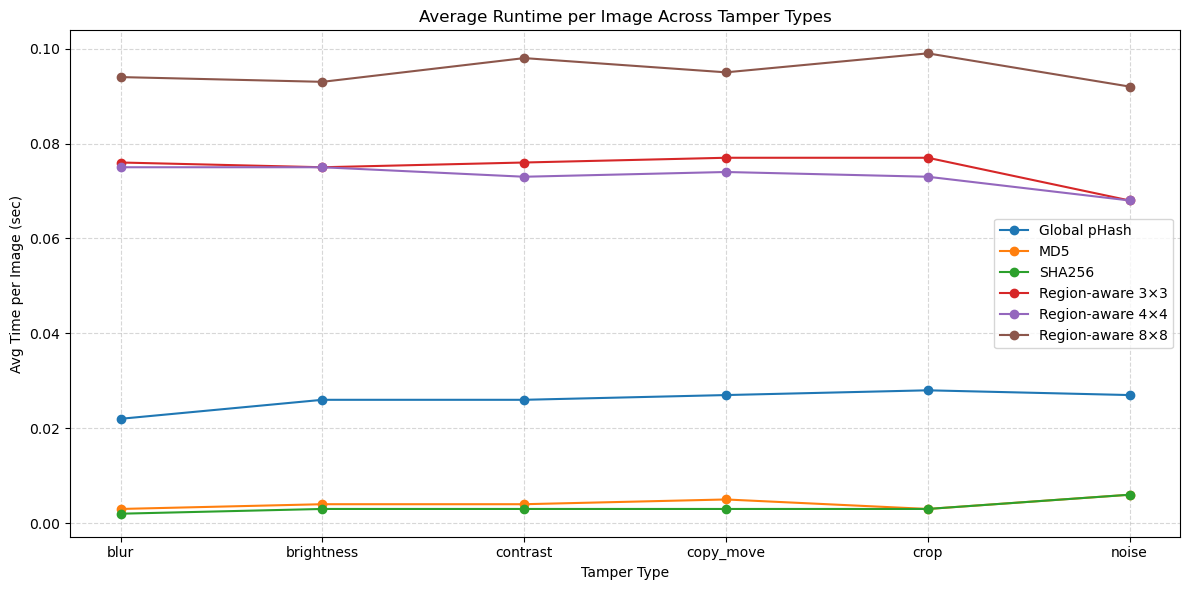

In [9]:
import matplotlib.pyplot as plt

# === Tamper Types ===
tamper_types = ["blur", "brightness", "contrast", "copy_move", "crop", "noise"]

# === Avg Time per Image (seconds) ===
avg_times = {
    "Global pHash": [0.022, 0.026, 0.026, 0.027, 0.028, 0.027],
    "MD5": [0.003, 0.004, 0.004, 0.005, 0.003, 0.006],
    "SHA256": [0.002, 0.003, 0.003, 0.003, 0.003, 0.006],
    "Region-aware 3×3": [0.076, 0.075, 0.076, 0.077, 0.077, 0.068],
    "Region-aware 4×4": [0.075, 0.075, 0.073, 0.074, 0.073, 0.068],
    "Region-aware 8×8": [0.094, 0.093, 0.098, 0.095, 0.099, 0.092],
}

# === Plot ===
plt.figure(figsize=(12, 6))
for method, times in avg_times.items():
    plt.plot(tamper_types, times, marker='o', label=method)

plt.title("Average Runtime per Image Across Tamper Types")
plt.xlabel("Tamper Type")
plt.ylabel("Avg Time per Image (sec)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

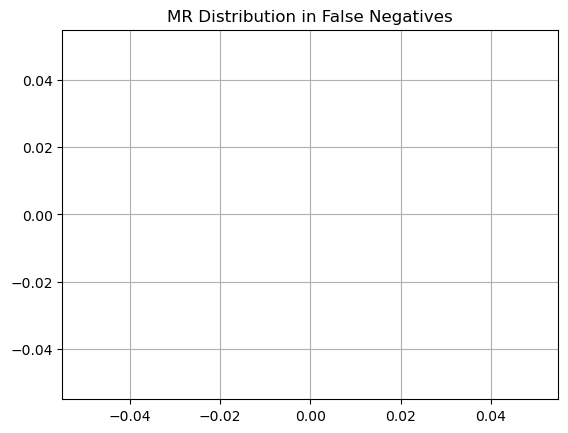

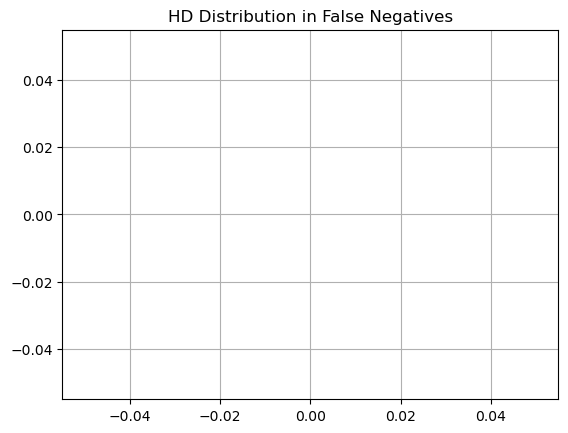

In [ ]:
sns.histplot(data=false_negatives, x="region_mr", bins=30, kde=True)
plt.title("MR Distribution in False Negatives")
plt.grid(True)
plt.show()

sns.histplot(data=false_negatives, x="region_hd", bins=30, kde=True)
plt.title("HD Distribution in False Negatives")
plt.grid(True)
plt.show()

In [ ]:

top_configs = full_df.groupby(["grid", "threshold"]).agg({
    "region_hd": "mean",
    "region_mr": "mean",
    "global_phash_diff": "mean",
    "is_actual_tampered": "mean",
    "is_predicted_tampered": "mean"
}).reset_index()

top_configs.sort_values("is_predicted_tampered", ascending=False).head(10)

top_configs["detection_accuracy"] = 1 - abs(top_configs["is_actual_tampered"] - top_configs["is_predicted_tampered"])
top_configs.sort_values("detection_accuracy", ascending=False).head(10)
top_configs.to_csv("C:\\Users\\Administrator\\OneDrive - Amrita vishwa vidyapeetham\\SEM6_CSE\\PROJECTS\\cnprj\\results\\top_config_summary.csv", index=False)